<a href="https://colab.research.google.com/github/jimmynewland/colabnotebooks/blob/main/Make_an_SED_for_YSOs_in_IC417_AAS_WM_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building a Spectral Energy Distribution (SED) Using Archived Telescope Data

<figure><img src="https://www.spitzer.caltech.edu/system/avm_images/binaries/6188/larger/sig16-008.jpg?1603784596"><figcaption>IC 417 - The Spider Nebula - Credit: <a href="https://www.spitzer.caltech.edu/image/sig16-008-the-spider-nebula">NASA/JPL-Caltech</a></figcaption></figure>

**Note to teachers:** This Google Colab notebook is a computational essay template allowing students to produce spectral energy distribution (SED) plots for potential young stellar objects (YSOs). Using a computational essay format exposes students to SQL and Python, which can access and process data from across multiple servers, while providing a narrative that can provide context and interpretation from researchers. While advanced users can modify the code and collaborate remotely and asynchronously, all students can access powerful astronomy tools with little preparation time or experience. This hosted Jupyter Notebook service does not require installation, login credentials, or admin privileges.

Scroll to the bottom for extra teacher resources!




# What are we doing?

Exploring young stellar objects (YSOs) is your chance to dive into real-world scientific discovery. To classify a YSO, you'll work on building and analyzing its spectral energy distribution (SED). This means calculating the object's brightness across different bandpasses, converting those numbers into energy densities, and comparing them at various wavelengths. The SED plot you create will reveal unique patterns that help you figure out the YSO's classification.

At first, this process might feel overwhelming, and that's okay. It's a challenge, but one you can totally handle. Along the way, you'll develop important skills like data analysis, problem-solving, and critical thinking. Plus, you'll get a behind-the-scenes look at how astronomers turn raw data into incredible discoveries. The best part? You're not just learning about science—you're doing it.

To help you focus on what matters most, this computational essay will be your guide. It can confirm your calculations, quickly generate multiple SED plots, and walk you through using Python code. By the end, you'll not only understand how to classify YSOs but also experience the thrill of working with real, possibly unexplored, astronomical data. Get ready to uncover the universe!



# What is this file?

This is what's called a "computational essay," which means we're going to walk you through some pretty significant code that real-world astronomers use to produce a special kind of graph called a spectral energy distribution, or SED.

An SED shows how the energy from an astronomical object, like a star, galaxy, or quasar, is spread out across different types of light. This includes light we can see, as well as light we can't see, like ultraviolet (UV), infrared (IR), and radio. By looking at the SED, astronomers can learn important things about the object, like its temperature, size, and distance.

Key uses of SEDs in astronomy include:

* Estimating the temperature of stars or galaxies.
* Learning about the amount of dust in galaxies or areas where stars are forming.
* Estimating the redshift of faraway objects.
* Figuring out how fast galaxies form stars and their star formation history.
* Studying the properties of stars and star-forming areas, including spotting possible young stars.

It's this last one that we're going to talk about in this page - trying to identify potential young stars (officially called young stellar objects, or YSOs), but you can use this code for any of those purposes!

Do you need a crash course in star formation? Watch <a href="https://www.youtube.com/watch?v=3WNQUqTSRH8&list=PLjCjDYabTFm9pkwiAXiEFyisaducz6bhf&index=4">NITARP: Crash Course in Star Formation</a> on YouTube!

# How does this file work?

If you haven't used one before, a Google Colab notebook is a free tool from Google that lets you write and run Python code in your web browser. It's like a notebook where you can mix code, text, pictures, and charts all in one place. You don't need to install anything, and your work is saved in Google Drive. Google Colab gives you access to powerful computers with special hardware that helps run big programs quickly, like for data science or machine learning. You can also share the notebook with others and work on it together, just like you would with a Google Doc.

## Can I mess it up by typing in it?
You can run this file right here and now without doing anything special.  If you make any changes, that's okay, it won't mess it up for anyone else.  

That said, it won't save your changes for later.  If you'd like to have a copy of this file to make your own changes and "play" with it, go to "File" and "Save a copy in Drive."  You may need to log in with your Google account if you haven't already, but once you do that, any changes you make will be permanent (to your copy).  Don't worry - if you actually seriously mess something up, you can always go back to the original link to get the "working copy."

## I double-clicked in the text somehow and now it's showing stuff in different colors

That's okay, you just got yourself into editing mode.  You can click in a different section and it's like nothing happened.

## There's a lot of code - do I have to read it all?

No - that's the great part about a "computational essay."  You can just read the text, run the code, and look at the output.  If you are interested in how it works, you can look at the code and see what's going on.  We've tried to include a lot of comments so you can tell what the code is actually doing even if you don't "speak Python."


In [1]:
# Comments are in green and have a number sign in front of them

## How do I run the actual code?

Click in the code area.  There's a play button - just click it.  Note: you sometimes can't see the play button unless you've actually clicked in the code area.

If you are into keyboard shortcuts you can also use Ctrl-Enter.  Try it below.

In [2]:
display('I am amazing!')

'I am amazing!'

## It didn't do anything.

It could be that it already was run.  Go to Edit and click "Clear All Outputs."  That will give you a "Fresh start."  Go back up and try it again.  The code says to display the phrase "I am amazing!" and then that's what should display below.

# Okay I'm ready, let's do this.

Awesome.  There are a few things we have to do to get started.  First off, we're going to need to bring in some special commands to talk to astronomy databases and do certain calculations.

**Be careful!** If you skip any steps (if you miss "playing" any sections), it's very likely the code will not work.


## Install Astronomy Libraries
These special commands are stored in what are called coding libraries, which are collections of pre-written code that you can use in your own programs to save time and effort. Instead of writing everything from scratch, you can use functions and tools from these libraries to do common tasks.

Google Colab does not include these in the library of tools already available, so we must install them every time we activate the notebook.

These are the two librarys we are going to install:
* [Astroquery](https://astroquery.readthedocs.io/en/latest/index.html) -  Allows us to use the best data science methods from astronomy research (it helps you query all sorts of databases all over the world).

* [PyVO](https://pyvo.readthedocs.io/en/latest/index.html) - Allows us to use Virtual Observatory (VO) tools, which help us connect to astronomy databases in a way that is easy to understand and use.

Run the code below, either by clicking the play button or typing Ctrl+Enter.  

*As a note, this is going to produce a whole bunch of obnoxious-looking output.  If you don't want to see it anymore after you run it, type Ctrl+m+o to run the  hide all the output.*

In [3]:
# Remember you can use CTRL+m+o or Command+m+o to hide this output after you run it
!pip install -U astroquery
!pip install -U pyvo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 50.7 MB/s eta 0:00:00


## Import additional commands

Now that we have installed the extra libaries we need, we need to tell Python which specific groups of commands we're going to want to use.  (Python doesn't automatically bring in everything all at once. Instead it just brings in exactly what it needs - this allows it to run faster.)

So what we're going to do here is import the commands that we're going to use that Python doesn't automatically have ready to go.

*Because we're teachers, we felt the need to explain why we included everything, but you don't have to read any of this, especially not your first time through -- just click run and move on!*

In [4]:
# AstroPy.Table  makes it easy to handle data in a structured way
from astropy.table import Table

# Imports the IRSA class from the Astroquery library, to easily access and
#   retrieve astronomical data from the Infrared Science Archive (IRSA)
from astroquery.ipac.irsa import Irsa

# PyVO is a popular library to interact with Virtual Observatory (VO) tools
import pyvo as vo

# This line of code brings in the SIA (Simple Image Access) module from the
#   pyvo.dal package of the PyVO library. The SIA module is used to get pictures
#   of stars and other space objects from different space data sources.
#from pyvo.dal import sia

# Imports the plotting library Matplotlib and allows the
#   shorthand "plt" to create graphs and charts
import matplotlib.pyplot as plt

# Imports the NumPy library and allows use the shorthand "np" to
#   perform powerful math operations and work with large arrays of numbers
import numpy as np

# Imports the pandas library and allows the shorthand "pd" to
#   work with data structures for organizing and analyzing data easily
import pandas as pd

# Imports the statistics module from the SciPy library, providing users
#   with tools and functions to do a linear regression
from scipy import stats

# Where do we get the data we need to make an SED?

To make a spectral energy distribution (SED), you need data about the energy output of an astronomical object across different wavelengths of light. This usually includes measurements from various regions of the electromagnetic spectrum, such as ultraviolet, visible, infrared, and sometimes even radio wavelengths. These measurements can arrive in a variety of units, but they are typically measuring what we see here on (or near) Earth, e.g., their apparent brightness. If the measurements are in magnitudes, that's apparent magnitude.

We can get this data from astronomical surveys. For this computational essay, we're going to pull data from these specific surveys:


Ground-Based:
* **IPHAS** (The **I**NT (Isaac Newton Telescope) **Ph**otometric **Hα** **S**urvey of the Northern Galactic Plane), *Visible*, La Palma, Canary Islands
* **Pan-STARRS** (**Pan**oramic **S**urvey **T**elescope **a**nd **R**apid **R**esponse **S**ystem), *Visible Light & Near-Infrared*, Haleakalā, Hawaii
* **2MASS** (**2** **M**icron **A**ll **S**ky **S**urvey), *Infrared*, at the Cerro Tololo Inter-American Observatory, Chile & Mt. Hopkins, Arizona

Space-Based:
* **Gaia**, *Visible*, Sun-Earth L2 point, from European Space Agency (ESA)
* Spitzer Space Telescope, **IRAC** (**I**nfra**r**ed **A**rray **C**amera; includes GLIMPSE and SEIP most commonly, which are different catalogs from this satellite's data), *Infrared*, Earth-trailing Solar orbit, from NASA
* **WISE** (**W**ide-field **I**nfrared **S**urvey **E**xplorer), includes AllWISE, CatWISE, and unWISE (which are different catalogs from this satellite's data), *Infrared*, Sun-synchronous polar orbit, from NASA

Each survey collects a lot of data and processes it using software pipelines. These pipelines turn raw telescope data into usable, calibrated data. They provide details like positions, brightness, and errors, along with quality flags that show how confident the computer is in the results. Sometimes the computer is sure, but other times it isn't—or it's confident when it shouldn't be!

For this project, we're using a catalog (IC417) that combines data from different surveys. It picks out the most useful information, removes unreliable sources, matches data across catalogs, converts values to magnitudes, and makes column names easier to understand.  So basically a lot of the tedious work has already been done for us.

*There is a **lot** more detail about all this at the end of this file, but if you're just going through it for the first time, don't worry about it!*
  


# Let's do this!!!!!

We'll organize this in the following way:

1. Load the catalog that we're interested in (Load the IC417 Table)
2. Pick the specific star that we want to look at (Select a Specific Target)
3. Import the data for processing:
 * Import Wavelengths and Zeropoint Reference Table (Wavelengths and Zeropoints)
 * Import the magnitudes for our star
4. Convert the values into fluxes and then energy densities for plotting
5. Calculate some reference lines:
 * Rayleigh-Jeans line
 * A best-fit line for our infrared excess values
6. Put everything together in a single plot!

## Load the IC417 table

This code will use an API (application programming interface) to get data from IRSA from the IC417 project.  You can alter this notebook to create any SED from any object that's in that IC417 dataset at IRSA. We're starting with a particularly nice one so you can make sure it's working!

(The data are coming from [this project](https://irsa.ipac.caltech.edu/data/NITARP/IC417/overview.html) and [this paper (open access)](https://iopscience.iop.org/article/10.3847/1538-3881/ace32f).)

* ```SELECT *``` means we're selecting all columns from the table
* ```FROM ic417``` means we're specifically pulling from the ic417 table

In [5]:
# Use API to grab data from IRSA
table_service = vo.dal.TAPService("https://irsa.ipac.caltech.edu/TAP")

tablename = 'ic417' #https://irsa.ipac.caltech.edu/data/NITARP/IC417/overview.html
result = table_service.run_async("""
           SELECT *
           FROM ic417
    """)
t = result.to_table()

## Select a specific target

We've chosen to look first at a potential YSO at a specific location that astronomers have already identified as a potential YSO.  This is the location:

* Right Ascension (RA): 05 hours, 27 minutes, 04.46 seconds
* Declination (Dec): +34 degrees, 25 minutes, 59.0 seconds

The coordinates that we feed to the computer for this are ```05:27:04.46 +34:25:59.0```. Its official name is based on that position and is ```052704.46+342559.0```

Remember that [this paper (open access)](https://iopscience.iop.org/article/10.3847/1538-3881/ace32f) has all the targets, but Figure 6 has the SED and images from this specific source ([in the pdf, Page 22, Figure 6](https://irsa.ipac.caltech.edu/data/NITARP/IC417/docs/2306.03728.pdf)).

## Other Possible Targets
The selected target is a class II YSO with a moderate amount of excess infrared light in the plot

Once you work through this notebook, come back here and change the coordinates for the target to look for from the catalog to one of these others. You can choose the **Runtime->Run Cell and Below** menu option to re-run all the necessary cells.

|**Target Coordinates**  |**IR Excess Level (class)**|
|------------------------|---------------------------|
|```052642.58+343350.3```|Extreme (YSO Class: I)     |
|```052745.78+343054.2```|High (YSO Class: flat)     |
|```052736.13+344519.0```|Virtually none (YSO class: III)      |

**Table: Good targets from other YSO classes.**

Not all targets from the catalog work as well as the ones above. Feel free to explore other YSO targets by <a href="https://irsa.ipac.caltech.edu/data/NITARP/IC417/catalog/rankorderedseds.pdf">looking through the spectral energy distribution plots</a> for other YSO candidates from the catalog.

In [6]:
# This code puts all of our potential YSO target coordinates into a list.
# The default target's coordinates are in the first from the list which is index
coordlist = ['052704.46+342559.0', # list index 0: default YSO shows some IR excess
             '052642.58+343350.3', # list index 1: extreme IR excess
             '052745.78+343054.2', # list index 2: high IR excess
             '052736.13+344519.0'] # list index 3: virtually no IR excess

In [7]:
# This loop is saying, "I know we read in that whole catalog, but I only
#    want you to pull out and work with this specific object"
# The coordinates for 4 example YSO are stored in the coordlist array as strings.

for r in t:
  if r['catalog_number'] == coordlist[0]: # Use any integer index from coordlist
    target = r

Other potential targets that work well with the given notebook.

If you'd like to see what the target data looks like you can run the code below.  Upside: it should help you appreciate all the stuff we're about to do to make this data actually useable!  (There's a lot more information in the catalog than we will use here; read the paper to see what a lot of this other information means and why it matters.)

In [8]:
# Display the column titles and values for the target row
print("Column Index: Title  - Corresponding Values for Target Row:")
for index, column in enumerate(t.colnames):
    print(f"{index}: {column} - {target[column]}")

Column Index: Title  - Corresponding Values for Target Row:
0: catalog_number - 052704.46+342559.0
1: ra - 81.76861
2: dec - 34.43306
3: whythisstarisinourlist - Witham+08 Ha bright, Winston+20 YSO
4: other_name_simbad - 
5: j08_name - Cl* Stock 8 JPO 1762
6: j17_name - 
7: j08_ha_star - --
8: j08_ob_star - --
9: j17_class - 
10: mn16_name - 
11: winston_20_yso_flag - 1
12: pandey_20_yso_flag - --
13: lata_19_name - 
14: lata_19_ysoflag - --
15: lata_19_period_d - --
16: spty - 
17: spty_src - 
18: tmass_name - 05270446+3425590
19: ukidss_name - 438466697935
20: glimpse360_name - G173.2454-00.3617
21: allwise_name - J052704.45+342559.2
22: catwise_name - J052704.45+342559.1
23: unwise_name - 0822p348o0008949
24: panstarrs_name - PSO J052704.461+342559.190
25: iphas_name - J052704.46+342559.2
26: gaia2_id - 182639262314508416
27: gaia3_id - 182639262314508416
28: pacs_names - 
29: akari_name - 
30: msx_name - 
31: nominal_cluster - 
32: ns - --
33: ns_subcluster - --
34: wise_irx - --
3

# Wavelengths and Zero Points
Here we're going to import a premade table that has all the wavelengths, names of filters (or bandpasses), and zeropoints for the surveys we are interested in.  If there is no entry for the zeropoint in the filter list (if it says NaN, or Not a Number), then those values are already fluxes in the source list. Wavelengths listed are describing the wavelength of the light allowed by the filter or the bandpass.

In case you forgot...

A a **filter** that lets only a specific range of wavelengths of light through while blocking the rest. The word **bandpass** is what we use to describe the range of wavelengths that the filter transmits. In astronomy, filters are used to look at different kinds of light from stars or galaxies, like subsets of  visible light or infrared light. Each bandpass shows how bright an object is in that particular range of light. In the infrared in particular, we often use the **central wavelength** or the **effective wavelength** of the filter as the name of the filter. In the optical, we often use a letter for the name of the filter. In any case, we'll use the central wavelength of the filter for plotting.

A **zeropoint** is a reference value used in astronomy to help compare the brightness of objects, like stars, when measured with different filters. It's the same concept as you use when calibrating a thermometer or a ruler. In this case, it's slightly more complicated, but it's a baseline that defines how bright a standard star would be if it had a specific standard brightness at a standard distance. When astronomers measure the magnitude (brightness) of an object, they use the zeropoint to convert raw data (like how much light the telescope detects) into a meaningful magnitude or flux value. The zeropoint ensures that brightness measurements are consistent across different observations and filters.

We'll get into more specific definitions of flux, flux density, and zeropoint flux density later.


In [9]:
# This code will read in a CSV file (it's similar to a spreadsheet but simpler)
#  that will make the data easy to work with in Python. Pandas is a library
#  that helps organize the data into rows and columns.

bandpasses = pd.read_csv('https://jimmynewland.com/astronomy/ipac/binap_bandpasses.csv')

You can see the data we pulled in by running the code below.  (You can skip this step if you're not interested.)  A few things you'll notice:

* The columns are:
  * band - the name of the column from the survey, as we mentioned earlier
  * lambda - the wavelength (in microns, or $10^{-6}$ m)
  * zeropoint - the zeropoint, measured in Jy
* Bandpasses are sorted by increasing wavelength.
* The table has information from more surveys than the ones we've talked about so far, like Akari.  That's because we like to have code that we can maybe one day expand on and we've already set ourselves up for that.

In [10]:
display(bandpasses)

,band,lambda,zeropoint
0,pangmag,0.4810,3631.0000
1,gaia3_bpmag,0.5110,3552.0100
2,panrmag,0.6170,3631.0000
3,gaia3_gmag,0.6220,3228.7500
4,iphasrmag,0.6240,2515.7000
5,iphashamag,0.6560,2974.4000
6,panimag,0.7520,3631.0000
7,iphasimag,0.7740,2515.7000
8,gaia3_rpmag,0.7769,2554.9500
9,panzmag,0.8660,3631.0000


## Create a table for Magnitudes and Energy Densities

We're going to begin to set up the table we'll use to organize the magnitudes and the calculated energy densities, using pandas, which is a data science library in Python designed to make these dataframes.  (It sounds super-cute, but PanDa actually comes from PANel DAta so not nearly as fun of an origin story as it should be...)

While we're figuring this out, let's also make "pretty versions" of the names, and what colors and symbols we're going to use.  If we do this all at once at the beginning, then we'll know we're being consistent later.

We'll write it out as well-organized as possible, to make sure everything matches.

Add colors, markers, and the catalog name (match the ones in the paper just to be super nifty):
* ps: cyan diamond
* iphas: orange diamond
* gaia: green square
* 2mass: black diamond
* irac: black circle
* wise: black star

Shorthand for symbols:
* Diamond - D
* Square - s
* Circle - o
* Star - *


In [11]:
# These are the column labels we already decided we want to use:
maglabels = [ 'pangmag',   'panrmag',  'panimag', 'panzmag',  'panymag',
             'iphasrmag',  'iphasimag', 'iphashamag',
              'gaia3_gmag', 'gaia3_bpmag', 'gaia3_rpmag',
              'bestjmag', 'besthmag', 'bestkmag',
              'irac1mag', 'irac2mag',
              'wise1mag', 'wise2mag', 'wise3mag','wise4mag',
]

catalog = ['PanSTARRS g','PanSTARRS r','PanSTARRS i','PanSTARRS z','PanSTARRS y',
          'IPHAS r','IPHAS i','IPHAS Ha',
           'Gaia G','Gaia Bp','Gaia Rp',
           '2MASS J','2MASS H','2MASS K',
           'IRAC-1','IRAC-2',
           'WISE-1','WISE-2','WISE-3','WISE-4',
           ]

color =   ['cyan', 'cyan', 'cyan', 'cyan', 'cyan',
           'orange', 'orange', 'orange',
           'green','green','green',
           'black','black','black',
           'black','black',
           'black','black','black','black',
]

marker = ['D', 'D', 'D', 'D','D',
          'D','D','D',
          's','s','s',
          'D','D','D',
          'o','o',
          '*','*','*','*',
          ]

display(len(catalog))
display(len(maglabels))
display(len(color))
display(len(marker))

20

20

20

20

Now this code is going to look at the target we specified before and pull the values associated with these specific columns.  (We haven't shown you all the units for each measurement but you can get into that if you really want to!)

If you displayed the tables above, you should be able to go up and see that (for example) whatever value the target had for ```pangmag``` is the same value you'll see for ```pangmag``` below!

In [12]:
maglist = []
for label in maglabels:
  maglist.append(target[label])

mags = pd.DataFrame(data = maglist, index=maglabels)

display(mags)

,0
pangmag,17.240
panrmag,16.340
panimag,15.940
panzmag,15.670
panymag,15.480
iphasrmag,16.340
iphasimag,15.580
iphashamag,15.730
gaia3_gmag,16.310
gaia3_bpmag,17.010


# Calculate Energy Densities

Now that we have loaded our data, we can calculate what we need to make our graph.

We want energy densities for each object for each band so that we can make an SED for each object. We need to manipulate each magnitude measurement to calculate the energy density for each filter (also called band or wavelength).

The columns with brightness measures that are already in Jy need some manipulation as well, but not nearly as much.



## Step 1: Convert magnitudes to flux densities

Remembering these terms:

* Brightness: We measure brightness by using sensors or cameras to collect light from the object. We need to quantify the brightness in order to do science! The units of the brightness depends on what we want to do with it, and can be in any of several units.

* Flux: This measures the amount of energy received from a celestial object per unit area and per unit of time. It indicates how bright the object appears from a certain distance based on how much light we see over a certain period.  

* Flux Density: This measures the flux, but per unit wavelength, so it's essentially giving you the brightness at that specific frequency. We'll use Janskys (Jy), where 1 Jy = $10^{−26}\frac{\mathrm{W}}{\mathrm{m²}}$

* Zeropoint Flux Density: This is a reference flux density value -- it's defined such that Vega works out to be 0th magnitude. Well, that is the zeropoint at least for Vega-based magnitudes. For AB magnitudes, the zeropoint is always 3631 Jy, so the reference in that case is a flat spectrum. (PanSTARRS are AB mags; the rest of the magnitudes here are Vega mags.) Ultimately, the purpose of this number is that it provides a way to tie the apparent brightness as detected in the survey to the intrinsic brightness of the target object.

* Magnitude: This is a logarithmic scale used to describe the brightness of astronomical objects. The magnitude of an object is related to the flux density relative to the zeropoint flux density. A lower magnitude number indicates a brighter object, while a higher number indicates a dimmer one.

The relationships can be summarized in the following way:

* The magnitude is defined using the following formula, where $m$ is the magnitude, $F_v$ is the flux density of the object, and $F_0$ is the zeropoint flux density:
 $$ m = -2.5 \mathrm{log}⁡_{10}{\frac{F_v}{F_0}}$$
* This formula shows that as the flux density increases (the object gets brighter), the magnitude decreases (the number becomes lower or more negative).

We can rearrange this equation to solve for $F_v$:
 $$-\frac{ m }{2.5}=  \mathrm{log}⁡_{10}{\frac{F_v}{F_0}}$$
 $$10^{-\frac{ m }{2.5}}=  {\frac{F_v}{F_0}}$$
 $$F_v= F_0 \cdot 10^{-\frac{ m }{2.5}}$$

The units of $F_0$ should be the same as you want to get out –- if you want Janskys (Jy), then $F_0$ should be in Jy (or if you want μJy, then $F_0$ should be in μJy). Because the brightness (flux density) of Vega ($F_0$) is different for each band, this number is different for each waveband.

If you are using AB mags, however, $F_0$ is always 3631 Jy.



### Wait, I'm confused.

Yeah, we all are!  If it helps, think about this this way:

* **Total energy (Joules)**: total number of cars that passed under freeway overpass

* **Power (J/sec, or Watts)**: rate of cars passing under the bridge, or total cars per unit time

* **Flux (power over area, watts/m^2)**: rate of cars passing per lane, or total cars / time / number of lanes

* **Flux density (power over area *at a particular wavelength or freq*, W/m^2/Hz, Janskys)**: rate at which cars of one particular color, in one lane, pass under bridge, on a many lane highway (yeah, we're in LA) carrying cars of all colors


### Special cases:
Watch for AB magnitudes (as we have for PanSTARRS). There, the zeropoint is not $F_0$, but 3631 Jy.  (AB magnitudes are a different way to measure how bright stars and other space objects are. The AB magnitude system was introduced by the astronomer Andy B. Cohen and is widely used because it provides a convenient way to compare the brightness of objects across different wavelengths of light.)

*Visit the wiki page [Central Wavelengths and Zero Points](http://coolwiki.ipac.caltech.edu/index.php/Central_wavelengths_and_zero_points) to get these numbers for more
generic cases, or [this](http://svo2.cab.inta-csic.es/svo/theory/fps/) for an even more extensive list -- there you can find actual filter transmission curves, central and effective wavelengths, and zeropoints in both Jy and cgs units, all of which are also available via VO API queries.*


In [13]:
# This function takes in the zeropoint flux density in a specific unit along
#   with its magnitude and outputs its flux density in the same units

def flux_density(zeropoint, mag):
  return zeropoint*10**(-mag/2.5)

## Step 2: Make the Flux Density Conversion

Now that we did the math and wrote the function, we're going to begin making the table for our SED.

For each label that we care about,
* Referring back to that bandpasses table we imported earlier:
  * We're going to pull the lambda value (this was the wavelength that it filtered at)
  * We'll also pull the zeropoint value
* Then pull the actual measured magnitude from the target we're interested in
* Convert the values to flux density
* Save the values to our table to use later

In [14]:
sed = []
for label in maglabels:
  # match the names of the label (if anything isn't spelled right, this will be bad!)
  # iloc means get the first matching row
  # float converts that value a "real number" (not an integer)
  l = float(bandpasses.loc[bandpasses['band'] == label, 'lambda'].iloc[0])
  zp = float(bandpasses.loc[bandpasses['band'] == label, 'zeropoint'].iloc[0])

  # This is the value of the actual magnitude for that label
  mag = mags[0][label]

  # Now we do the conversion to flux density
  flux = flux_density(zp, mag) # Step 3 of Rebull 2023 SED Worksheet

  # Save the value to our SED table
  sed.append(flux)

Converting here so that all of the different surveys' data can be displayed nicely in the SED.  Infrared astronomers use wavelengths in microns while optical astronomers like Angstroms or nanometers while Radio Astronomers prefer frequencies of light.  
In order for our SED to be meaningful to all at the same time, conversion is necessary.

## Step 3: Convert Flux Densities to cgs Units

We have some columns where we've calculated the flux densities from the magnitudes, but we have other columns that started in flux densities. We need to convert all of these numbers that are in Jy (Janskys) or some varietal thereof (mJy, μJy) to ergs/sec/cm²/Hz. Caution: some of these numbers might be in μJy or mJy, not Jy.

**Part A:** This one is straightforward -- 1 Jansky = $10^{-23}$ ergs/s/cm²/Hz

**Part B:**  Another conversion is needed because the units aren't quite right yet. We have $F_v$ (“per frequency” meaning “per Hz”) and we need $F_λ$ (“per wavelength” meaning “per cm”). To convert $F_v$ into $F_λ$, multiply by c over lambda squared: $$F_λ = F_v \frac{c}{λ^2}$$

(To derive this, to show why it's not just c over lambda, you need calculus. λν = c but ν = c/λ and you need to get it into differentials to get “per frequency” or “per Hz”, but $\frac{\mathrm{d}}{\mathrm{dx}}\frac{1}{x}$ is $\frac{1}{x^2}$ so it's $\frac{c}{λ^2}$.) The speed of light, c, is $3 \times 10^{10}$ cm/sec. λ also needs to be in cm for the units to work out.

This number is the central wavelength, sometimes called the effective wavelength, e.g., the effective center of the filter.

**Part C:** What we actually need to plot is energy density. What we have right now is still flux density (just in different units, now $F_λ$, compared to when we started).  Energy density is $λF_λ$. To go from ergs/sec/cm²/cm (where that last “per cm” is “per photon's wavelength”), we need to multiply by the photon's wavelength to get ergs/sec/cm². This number will, of course, be different for each band -- it will be the filter's central wavelength.




In [15]:
justWavelengths = []

for label, cat, displayColor, markerType, flux in zip(maglabels, catalog, color, marker, sed):
    # Get the wavelength value
    lambda_value = float(bandpasses.loc[bandpasses['band'] == label, 'lambda'].iloc[0])

    # Get the magnitude value for that label
    mag = mags[0][label]

    # Save the values as a dictionary to our list
    justWavelengths.append({'Wavelength': lambda_value})

# Create a pandas DataFrame from the list of dictionaries
justWavelengths_table = pd.DataFrame(justWavelengths)


# The section of code converts from Janskys (Jy) to erg/s/cm**2 per Rebull 2023 SED
for i in range(len(maglabels)):

  # Part A:  1 Jansksy = 10^-23 ergs/s/cm^2/Hz (cgs)
  sed[i] = sed[i] * 10**-23

  # Part B: - convert F-nu to F-lambda
  # Multiply by c/lambda^2 - c = 3*10^10 cm/s & lambda in μm
  sed[i] = sed[i] * 3*10**10 / (justWavelengths_table.Wavelength[i]**2)

  # Part C
  # calcuate lambda * F-lambda and convert from μm to cm. 1 micron = 10^-4 cm
  sed[i] = justWavelengths_table.Wavelength[i] * sed[i]  / 10**-4

# Putting it all together

We have our edited data ready to go!  We have the bands we want, we know what colors, and how we want them to look.  Now we just need to put them all in a single table that we can use to plot later.

In [16]:
# Initialize an empty list to store the data
wavelengthsForUs = []

for label, cat, displayColor, markerType, flux in zip(maglabels, catalog, color, marker, sed):
    # Get the wavelength value
    lambda_value = float(bandpasses.loc[bandpasses['band'] == label, 'lambda'].iloc[0])

    # Get the magnitude value for that label
    mag = mags[0][label]

    # Save the values as a dictionary to our list
    wavelengthsForUs.append({'Catalog': cat,'Label': label, 'Wavelength': lambda_value, 'Magnitude': mag, 'Color': displayColor, 'Marker':markerType, 'Flux':flux})

# Create a pandas DataFrame from the list of dictionaries
wavelength_table = pd.DataFrame(wavelengthsForUs)

# Display the DataFrame
display(wavelength_table)

,Catalog,Label,Wavelength,Magnitude,Color,Marker,Flux
0,PanSTARRS g,pangmag,0.4810,17.240,cyan,D,2.877414e-12
1,PanSTARRS r,panrmag,0.6170,16.340,cyan,D,5.138807e-12
2,PanSTARRS i,panimag,0.7520,15.940,cyan,D,6.094382e-12
3,PanSTARRS z,panzmag,0.8660,15.670,cyan,D,6.786246e-12
4,PanSTARRS y,panymag,0.9620,15.480,cyan,D,7.277336e-12
5,IPHAS r,iphasrmag,0.6240,16.340,orange,D,3.520428e-12
6,IPHAS i,iphasimag,0.7740,15.580,orange,D,5.715301e-12
7,IPHAS Ha,iphashamag,0.6560,15.730,orange,D,6.944113e-12
8,Gaia G,gaia3_gmag,0.6220,16.310,green,s,4.659779e-12
9,Gaia Bp,gaia3_bpmag,0.5110,17.010,green,s,3.274723e-12


# Determine Rayleigh-Jeans Reference Line Parameters

The Rayleigh-Jeans (RJ) reference line is used to "guide the eye" to make it easier to see whether or not there is an IR excess at long wavelengths. If an object's brightness is measured and doesn't match this line, it suggests that something unusual or special is happening, because the object looks different from a blackbody curve (what the Rayleigh-Jeans Law would predict).

In our case, adding this line helps to highlight the infrared excess for a target. If the measured SED falls above the RJ line in the plot, then it has an IR excess.

To make the line, we're going to *create an imaginary twin star* to our target object, pick two points along different parts of the spectrum to define this imaginary twin star's light, and draw a line between them.

* **Point 1: K-band (short wavelength of the RJ line).**
 We use K-band data as the shortest wavelength on the RJ side because, for most stars, the K band likely shows light from the star's surface (called the photosphere) and isn't strongly affected by extra infrared light from dust around the star. This is an assumption—it doesn't always work—but it's a good starting point. Especially when we don't know much about our target stars, this might be the best option we have!
 * We are going to make an imaginary twin star to our target, and the twin is going to be exactly the same as our target at K band.
 * The x-coordinate (lambda) is just our value 2.2 μm. (Technically, we'll use the log of this value.)
 * We already have the y-coordinate (energy density) from above -- the twin is the same brightness as our target. (Likewise, we're plotting the log of the energy density.)
* **Point 2: Long-wavelength end of the RJ line.**
To define a line, we need at least two points, so we need another point on the RJ line.

   * Our imaginary twin star has the same K as our target. However, it has no dust around it, so the light we see comes only from the star itself. There's no extra infrared light caused by dust (no IR excess).

   * For a dust-free star, when there's no IR excess, the IR color is 0. This means that the difference between the brightness at K and any other wavelength in magnitudes —like 8, 22, or 24 microns— is zero. For example, K-[24]=0 simply means that the star has the same brightness distribution as a star without dust (roughly that of a blackbody), e.g., there's no dust contributing extra light. (That's one reason magnitudes are defined the way they are!)

   * Since we know K for our twin star, we can pick another wavelength, like 24 microns. If K-[24]=0, then K equals [24]. This means that if there's no IR excess, [24] would match your K value. So we'll use this imaginary twin star, treat [24] as equal to our K, and convert it into energy density so we can add it to our plot.

 * For the x-coordinate (lambda), it's just 24 μm. (well, the log of that.)
 * For the y-coordinate:
   * Step 1: Look up the zero-point for [24] (which is WISE-4).
   * Step 2: Convert [24] (which is the same as the measurement at K in magnitudes, because K-[24]=0 so K=[24]) to flux density using the same equation as before ($F_v= F_0 \cdot 10^{-\frac{ m }{2.5}}$).
   * Step 3: Convert Jansksys to cgs via  $10^{-23} \frac{ \mathrm{ergs} }{\mathrm{s} \cdot \mathrm{cm}^2 \cdot \mathrm{Hz}}$  
   * Step 4: Convert $F_\nu$ to $F_\lambda$ (Multiply by $\frac{c}{\lambda^2}$)
   * Step 5: Calculate $\lambda \cdot F_\lambda$ and convert from μm to cm. Remember that 1 μm = $10^{-4}$ cm
   * Now you have an energy density for your imaginary dust-free twin star where K-[24]=0.

**Add this line to the plot**. Just connect those two points to make the plot of the RJ line.

In [17]:
# Look up what we need to calculate y-coordinate for point 1:
ourTarget_kband = mags[0]['bestkmag']
zeropoint2_2 = float(bandpasses.loc[bandpasses['band']=='bestkmag', 'zeropoint'].iloc[0])

# Convert to energy density
# The constant 3*10**-9 converts from Jy to erg/s/cm**2
energyDensity2_2 = np.log10(flux_density(zeropoint2_2, ourTarget_kband)*3*10**-9/2.6) #lambda is 2.6 μm

# We just looked this up on the Internet
# It's the zeropoint for 24 μm from the MIPS1 or M1 Spitzer channel
# https://coolwiki.ipac.caltech.edu/index.php/Central_wavelengths_and_zero_points
zeropoint_24 = 7.14 # Jy
energyDensity24= np.log10(flux_density(zeropoint_24, ourTarget_kband)*3*10**-9/24)

# Set up the x (lambda) values so we can plot them later:
RJ_lambda = np.array([])
RJ_lambda = np.append(np.log10(2.2), RJ_lambda)
RJ_lambda = np.append(np.log10(24), RJ_lambda)

# Set up the y (energy density) values to plot as well:
RJ_energyDensity = np.array([])
RJ_energyDensity = np.append(energyDensity2_2, RJ_energyDensity)
RJ_energyDensity = np.append(energyDensity24, RJ_energyDensity)

#Add Best-fit Line to IR Excess

Astronomers have assembled a "story of star formation" based on the shape of YSO SEDs. We started by putting things in different piles based on the SED shape. In the beginning, we had SEDs that didn't have very many points, and certainly not too many long wavelength points. Now we have an abundance of data, and often really a lot of long wavelength points.  You may, now that we are swimming in data, question our life choices, but you just have to trust me that this made a lot of sense when we had only a small handful of points between 2 and 25 microns.

Following Wilking et al. (2001), we fit a line to all the detections (not limits) in the SED slope between 2 and 25 microns. Then:
*	if the slope > 0.3, then the SED class = I
*	if the slope < 0.3 and the slope > -0.3, then the SED class = Flat
*	if the slope < -0.3 and the slope > -1.6, then the SED class = II
*	if the slope < -1.6, then the SED class = III

It may bother you that in many cases, the SED has more 'texture' than can be captured by a linear fit. Yes, you're right! A line may very well be a poor fit to the actual data! See "life choices," above.

So, we will plunge onwards and find the best-fit line to all the points between 2 and 25 microns.
For any entry in our dataset with a wavelength larger than 2 μm, we'll store both the wavelength and the energy density.

*NOTE: in this current version (1.0) of this notebook, it's not looking to exclude the limits. Yet. It's assuming everything is a detection. This is fine for our suggested sources, because everything in our suggested sources' SEDs are detections. In a future version, we will do this properly and exclude the limits.*

Next, we'll use a Python function called ```linregress``` which does a linear regression (a "best fit line") on the data.

In [18]:
# Create a blank lambda (x-coordinate) array to add values to
actualLambda = np.array([])

# Create a blank energy density (y-coordinate) array to add values to
actualFlux = np.array([])

for i in range(len(wavelength_table)):
  data = wavelength_table.iloc[i]
  currentWavelength = data['Wavelength']
  currentFlux = data['Flux']
  # If our wavelength is larger than 2 μm, add the logarithms of those
  #   values to our list to look at in the next part
  if currentWavelength > 2:
      actualLambda = np.append(np.log10(currentWavelength), actualLambda)
      actualFlux = np.append(np.log10(currentFlux), actualFlux)

# Get coefficients of our linear fit log10(lambda) vs log10(flux)
#   It's giving us r values, p values, and a standard error, but we don't
#   specifically care about that - we just want the slope and y-intercept
bestFitSlope, bestFitIntercept, r_value, p_value, std_err = stats.linregress(actualLambda, actualFlux)

# Display Everything!

Now we will plot our SED with the Rayleigh-Jeans Reference Line and the IR Excess Best-Fit.

First we'll plot the theoretical RJ line as a dashed blue line, and the best fit line to our actual values with a dashed red line.

The SED itself is a scatter plot, so we're not connecting any of them with lines.

*NOTE: in this current version (1.0) of this notebook, it's not looking to plot the limits as downward arrows. Yet. It's assuming everything is a detection. This is fine for our suggested sources, because everything in our suggested sources' SEDs are detections. In a future version, we will do this properly and plot the limits as limits.*

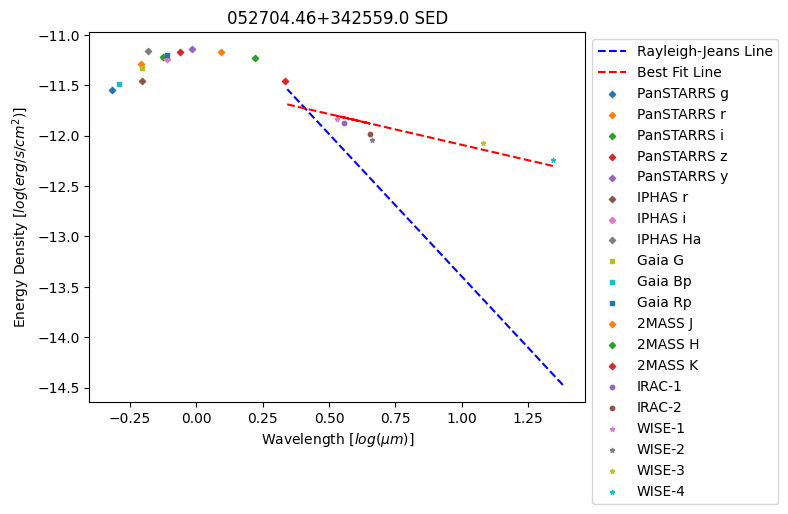

In [19]:
fig, ax = plt.subplots()

plt.title(target['catalog_number']+' SED')
plt.xlabel('Wavelength $[log({\mu}m)]$')
plt.ylabel('Energy Density [$log(erg/s/cm^2)$]')

# Plot the Rayleigh-Jeans line
plt.plot(RJ_lambda, RJ_energyDensity, linestyle='dashed', c='b', label='Rayleigh-Jeans Line')

# Plot the best-fit line for the Rayleigh-Jeans line to show IR excess
#    This is just y = mx + b
plt.plot(actualLambda, bestFitSlope*actualLambda + bestFitIntercept, linestyle='dashed', c='r', label='Best Fit Line')

# Plot all the points we put together in that wavelength table we made
# The variable d is just referring to each row of the table, and we're getting
#    specific information from each row to plot
for i in range(len(wavelength_table)):
  d = wavelength_table.iloc[i]
  plt.scatter(x=np.log10(d['Wavelength']), y=np.log10(d['Flux']), marker=d['Marker'] ,label=d['Catalog'], s=10)

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

## Check Your Graph with the Experts

The image below is an SED from Rebull and colleagues for the given target using an IDL programming framework and is included here for comparison and verification purposes.  (We actually already know what the answer is going to look like because the IC417 scientists made these graphs for every object in their database.  This way we can double-check and make sure our answer looks "right"!)

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pathtosedfromtable = target['pathtosed'][9:-9]
pathtosed = 'https://irsa.ipac.caltech.edu/'+pathtosedfromtable

import IPython
display(IPython.display.HTML('''
<iframe src="'''+pathtosed+'''"
height="268px" width="268px"></iframe>'''))

# Teacher Notes
Young stellar objects (YSOs) were the focus of a recent NITARP project. Classifying a YSO requires creating and analyzing its spectral energy distribution (SED). This involves determining the object's brightness in various bandpasses and converting those values into energy densities. By comparing the energy densities across different wavelengths, astronomers can identify distinctive patterns in the SED plot, which reveal the YSO's classification.

While this process can be challenging for students, it's entirely manageable with the right approach. Many students may initially feel overwhelmed as they work through constructing the SED plot. However, once completed, the SED makes the YSO's classification clear. This computational essay provides a faster way to generate these plots, allowing students to focus on interpreting the results.

As a teacher, this essay may be used as a tool that can:
* confirm the tedious calculations that form a single SED
* compute several SED plots quickly
* lead a student through the python code and its potential other uses
* help a student experience the real world of discovery in astronomy using possibly unexplored data

Here are some links that can provide some additional background:
* https://vmcoolwiki.ipac.caltech.edu/index.php/Standalone_Lessons
* https://vmcoolwiki.ipac.caltech.edu/index.php/Entry-Level_Research_Projects
* Do you need a crash course in star formation? Watch <a href="https://www.youtube.com/watch?v=3WNQUqTSRH8&list=PLjCjDYabTFm9pkwiAXiEFyisaducz6bhf&index=4">NITARP: Crash Course in Star Formation</a> on YouTube!


# Tell me more about everything!

There is a lot of extra planning that goes into making this available.  If you are thinking about expanding it to other stars (and especially if you're thinking about looking at stars outside IC417), you're going to have to get into the details.

## How are the data organized?

Each survey has created a database of information, sometimes a LOT of information. You can get into the documentation that goes with each data delivery from each telescope and learn a LOT about what data they have provided. In the case of *each* of these surveys, they have (at least) one pipeline -- that is, one big suite of software that runs on the data that come off the telescope and turn those raw data into calibrated data you can use. The pipelines include information such as position and errors on position, brightness measurements and errors on the brightness measurements (for each of the bands used by that survey), and things like data quality flags, which is where the computer itself is telling you how confident it is in the numbers it is giving you. (Sometimes it is confident, and sometimes it is not ... and sometimes it is confident when it shouldn't be!)

**In the case of this project, to make it easier for you, we will be working with a catalog that already has pulled all of these catalogs together, extracted the most useful data, discarded the sources in which the computer is not confident, matched the sources across the catalogs, converted everything to magnitudes, and turned the (often cryptic) column headers into something more systematically human-readable.**

For example, the Gaia survey looks at visible light, and reports values in three filters: Gp (if it helps, think of it as green), Rp (red), and Bp (blue).  Here, the column labeled ```gaia3_gmag``` is the green filter, ```gaia3_rpmag``` is the red filter and ```gaia3_bpmag``` is the blue filter. (For completeness, we note that in the original database, G can be ```phot_g_mean_mag```, or ```phot_g_mean_flux``` if you need that specific output from the pipeline, then there's ```phot_bp_mean_mag``` and ```phot_rp_mean_mag```... and then to get the error in G magnitudes you have to do ```1.086/phot_g_mean_flux_over_error``` ... yeah, that's why we grabbed things for you and translated them. Definitely just go with what we give you here to start, but if you want to do more on your own, you will need to get into the documentation that goes with each catalog.)

Here is the summary of the most important parts of this survey in this blended, easier-to-work-with catalog and its columns:

* IPHAS
 * iphasrmag : r' mag
 * iphasimag : i' mag
 * iphashamag : halpha mag (a narrowband filter)
* Pan-STARRS
 * pangmag : g mag
 * panrmag : r mag
 * panimag : i mag
 * panzmag : z mag
 * panymag : y mag
* 2MASS (these are all called 'best' because they're grabbing from several possible catalogs, but they're all the same as the 2MASS JHKs filters)
 * bestjmag : J mag
 * besthmag : H mag
 * bestkmag : Ks mag
* Gaia
 * gaia3_gmag : Gp mag
 * gaia3_bpmag : Bp mag
 * gaia3_rpmag : Rp mag
* IRAC
 * irac1mag : [I1] mag
 * irac2mag : [I2] mag
* WISE
 * wise1mag : [W1] mag
 * wise2mag : [W2] mag
 * wise3mag : [W3] mag
 * wise4mag : [W4] mag

The 2MASS, IRAC, and WISE columns also have corresponding limit flags (wise1flim, etc), which tell you whether or not the number that is stored in, say, wise1mag is meant to be a limit (wise1flim is "<" if that number in wise1mag is a bright limit to the true flux of this source at that band).

There are more columns than this in the full catalog (there are about 200 columns!), but these are the ones we'll work with here.

## Does every potential star have data from all the potential sources?

Definitely not.  Not all surveys looked at all parts of the sky, and these sources cover a variety of brightnesses, so we may or may not have data from all the sources.  We have the code set up so that if there isn't any data, we just leave it "blank."

When this program looks for objects, these labels or fields will fill with numbers that show how bright the object is when seen with that specific telescope. Depending on the telescope (and the part of this process), these numbers might be given in different ways, like magnitudes or fluxes.

After any needed calculations, these values will be used for the y-axis of the SED.

## What if I want to work with a different object?

You can pick another object from the IC417 YSO catalog; just change the coordinate it's using in the code above.

You can make an SED for anything elsewhere in the sky that has flux-calibrated measurements (photometry and/or spectroscopy), you just have to pull all the data together and convert all the measurements. The notebook above is pulling data for IC417 because that catalog is conveniently ready-to-use with all the data already merged. You would have to write code to pull photometry from the original source catalogs and merge it together and convert the data, then make the SED. It's possible!  [Here](https://colab.research.google.com/drive/1YBBuOP8YkH6HsKZWRGcCb_numfWKPcDQ#scrollTo=GUfn0cSczvWj&line=56&uniqifier=1) is a different notebook that does some of that.

## Wait, I don't get that whole RJ line thing...

The twin imaginary star is the same brightness at K, but when you say K-[24]=0 that doesn't mean that it is the same brightness at 24. Here is a real life example. For a real star I have, K in magnitudes is 12.04, which converts to a K flux of 10174.5 μJy. A
RJ line then would go to 24 μm at 109 μJy and to 100 μm at 6.6 μJy. This is very much not the same flux density (or brightness), but because of the definition of magnitudes, that's K-[24]=0 and K-[100]=0. This is because a magnitude is really a flux ratio. (This 'trick' is one of the reasons why the 'weird', archaic magnitude system is still in use, thousands of years after the Greeks set it up.)

# Future Enhancements

* The impetus behind this project was that teachers working on research projects needed a progromatic way to generate SED plots for targets. This project does a great job of explaining the steps and demonstrating how to make a single SED. However, many research projects in this area need to produce dozens of SED plots. That is a natural next step for the future.

* Also, the bandpasses used here could be referenced directly from the various missions and observatories themselves. Instead of using a curated list of bandpasses in a separate file, the bandpasses could be entered directly into the notebook as a list. This makes them "hard coded" and perhaps easier to update than maintaing a seperate file.

* And ultimately, the notebook can be altered to allow any object that resides in any IRSA database to be queried and the various fluxes and magnitudes obtained programmatically rather than depending on an existing catalog of YSO candidate fluxes and magnitudes.


# Acknowledgments

This notebook was built by a collaboration of members of [BINAP](https://nitarp.ipac.caltech.edu/) to produce spectral energy distributions for objects using data from the [Infrared Science Archive](https://irsa.ipac.caltech.edu/frontpage/) run by [IPAC](https://www.ipac.caltech.edu/) at the [California Institute of Technology](https://caltech.edu/).


When complete, the SED will be a plot of energy density vs wavelength for a given YSO in IC417.  


The data in this notebook comes from [Rebull at al.](https://ui.adsabs.harvard.edu/abs/2023arXiv230603728R%2F/abstract) and potential young stellar objects.


Most of this notebook was developed using the steps provided in <a href="https://vmcoolwiki.ipac.caltech.edu/images/1/12/Makingseds2020.pdf">this step by step document</a> from Dr. Luisa Rebull.  It was simplified for classroom use by:

* James Newland, Texas Advanced Computing Center, University of Texas at Austin
* April Andreas, McLennan Community College, Waco, Texas
* Justin Hickey, Episcopal High School, Bellaire, Texas
* Susan Kelly
* Elizabeth Ramseyer, NITARP
* Luisa Rebull, Caltech-IPAC/IRSA
* David Strasburger, Lawrence Academy, Groton, Massachusetts
